# EDA

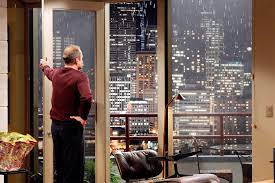

In [5]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [6]:
eda_data = pd.read_csv('/Users/rishabhhasija/Documents/neuefische/EDA_project01/data/eda_data.csv')
eda_data.head()

details_id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0     1000102     6.000      3.000     2400.000  9373.000   2.000         NaN   
1     1000102     6.000      3.000     2400.000  9373.000   2.000         NaN   
2   100100050     3.000      1.000     1320.000 11090.000   1.000       0.000   
3  1001200035     3.000      1.000     1350.000  7973.000   1.500         NaN   
4  1001200050     4.000      1.500     1260.000  7248.000   1.500         NaN   

   view  condition  grade  ...  sqft_basement  yr_built  yr_renovated  \
0 0.000          3      7  ...          0.000      1991         0.000   
1 0.000          3      7  ...          0.000      1991         0.000   
2 0.000          3      7  ...          0.000      1955         0.000   
3 0.000          3      7  ...          0.000      1954         0.000   
4 0.000          5      7  ...          0.000      1955           NaN   

   zipcode    lat     long  sqft_living15  sqft_lot15   sale_date      price  
0    98002 47.326 -122.214       2060.000    7316.000  2014-09-16 280000.000  
1    98002 47.326 -122.214       2060.000    7316.000  2015-04-22 300000.000  
2    98155 47.775 -122.304       1320.000    8319.000  2014-11-12 275000.000  
3    98188 47.432 -122.292       1310.000    7491.000  2015-03-06 272450.000  
4    98188 47.433 -122.292       1300.000    7732.000  2014-09-23 259000.000  

[5 rows x 21 columns]

Checking initially how the data looks, to get better insight.

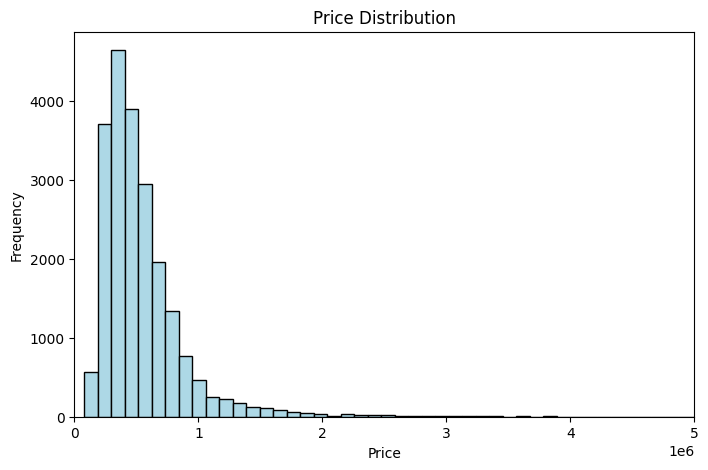

In [7]:
plt.hist(eda_data['price'], bins=70, color='lightblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0, 5000000)
plt.show()

### Data Preparation with required columns for doing analysis

#### EDA - 1: Fixing Column Names & Formats

We start with checking and fixing column names & formats

In [8]:
eda_data.columns

Index(['details_id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sale_date', 'price'],
      dtype='object')

The column naming and formatting convention looks correct.

#### EDA - 2: Checking Duplicates

In [9]:
duplicates = eda_data[eda_data.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [details_id, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15, sale_date, price]
Index: []

[0 rows x 21 columns]


The dataset seem to have all unique values only. 

#### EDA - 3: Data Types & Transforming Data

In [10]:
eda_data.dtypes

details_id         int64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
sale_date         object
price            float64
dtype: object

In [11]:
#changing Sale Date to Datetime format
type(eda_data['sale_date'])
eda_data['sale_date'] = pd.to_datetime(eda_data['sale_date'])

In [12]:
#converting Zipcode to categorical variable
eda_data['zipcode'] = eda_data['zipcode'].astype('category')

In [13]:
eda_data.yr_renovated.unique()

array([    0.,    nan, 20140., 19890., 19830., 19690., 19840., 20020.,
       19970., 19990., 20100., 20030., 19950., 20070., 19770., 20000.,
       20080., 19920., 20050., 19910., 19960., 19620., 19870., 20090.,
       20130., 20060., 19900., 20010., 20120., 19650., 20040., 19400.,
       19550., 19860., 19940., 19980., 20110., 19640., 19790., 19580.,
       19680., 19850., 19630., 19800., 19740., 19700., 20150., 19820.,
       19720., 19810., 19450., 19500., 19560., 19570., 19930., 19670.,
       19880., 19540., 19600., 19750., 19460., 19480., 19780., 19760.,
       19340., 19730., 19590., 19530., 19440., 19510., 19710.])

In [14]:
#eda_data.yr_renovated.fillna(0,inplace=False)

#eda_copy = eda_data.copy()
#eda_copy['yr_renovated'] = eda_copy['yr_renovated']/10
#def clean_yr_renovated(value):
#    if pd.isna(value):
#        return value
#    value = str(value).strip('.')
#    return value

#eda_copy['yr_renovated'] = eda_copy['yr_renovated'].apply(clean_yr_renovated)

#eda_data['yr_renovated'].fillna(0, inplace=True)
#eda_data['yr_renovated'].replace('nan', np.nan, inplace=True)
#eda_data['yr_renovated'] = eda_data.yr_renovated.astype('Int64')
#eda_data['yr_renovated'] = eda_data['yr_renovated']/10
#eda_copy['yr_renovated'] = eda_copy.yr_renovated.astype('int')
#eda_copy.yr_renovated.unique()


In [15]:
#eda_copy = eda_data.copy()
#eda_copy.yr_renovated.fillna(0, inplace=True)
#eda_copy.yr_renovated.dtype
#eda_copy.yr_renovated = eda_copy['yr_renovated']/10
#eda_copy.yr_renovated = eda_copy.yr_renovated.astype('int')
#eda_copy.yr_renovated.unique()

In [16]:
#using numpy to remove '0.' values from Year Renovated column
eda_data['yr_renovated'] = eda_data['yr_renovated'].astype(str)  #convert Col. to strings
eda_data['yr_renovated'] = eda_data['yr_renovated'].str.replace('.0', '', regex=False)  #replace '.0' with an empty string for non-NaN values
eda_data['yr_renovated'] = eda_data['yr_renovated'].replace('nan', np.nan).fillna(0).astype(int)
eda_data['yr_renovated'] = eda_data['yr_renovated']/10
eda_data.yr_renovated.unique()

array([   0., 2014., 1989., 1983., 1969., 1984., 2002., 1997., 1999.,
       2010., 2003., 1995., 2007., 1977., 2000., 2008., 1992., 2005.,
       1991., 1996., 1962., 1987., 2009., 2013., 2006., 1990., 2001.,
       2012., 1965., 2004., 1940., 1955., 1986., 1994., 1998., 2011.,
       1964., 1979., 1958., 1968., 1985., 1963., 1980., 1974., 1970.,
       2015., 1982., 1972., 1981., 1945., 1950., 1956., 1957., 1993.,
       1967., 1988., 1954., 1960., 1975., 1946., 1948., 1978., 1976.,
       1934., 1973., 1959., 1953., 1944., 1951., 1971.])

In [17]:
eda_data['yr_renovated'] = eda_data['yr_renovated'].astype(str).str.rstrip('.').astype(float).astype(int)
eda_data.yr_renovated.unique()

array([   0, 2014, 1989, 1983, 1969, 1984, 2002, 1997, 1999, 2010, 2003,
       1995, 2007, 1977, 2000, 2008, 1992, 2005, 1991, 1996, 1962, 1987,
       2009, 2013, 2006, 1990, 2001, 2012, 1965, 2004, 1940, 1955, 1986,
       1994, 1998, 2011, 1964, 1979, 1958, 1968, 1985, 1963, 1980, 1974,
       1970, 2015, 1982, 1972, 1981, 1945, 1950, 1956, 1957, 1993, 1967,
       1988, 1954, 1960, 1975, 1946, 1948, 1978, 1976, 1934, 1973, 1959,
       1953, 1944, 1951, 1971])

#### EDA - 4: Checking for Missing Values

details_id          0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
sale_date           0
price               0
dtype: int64

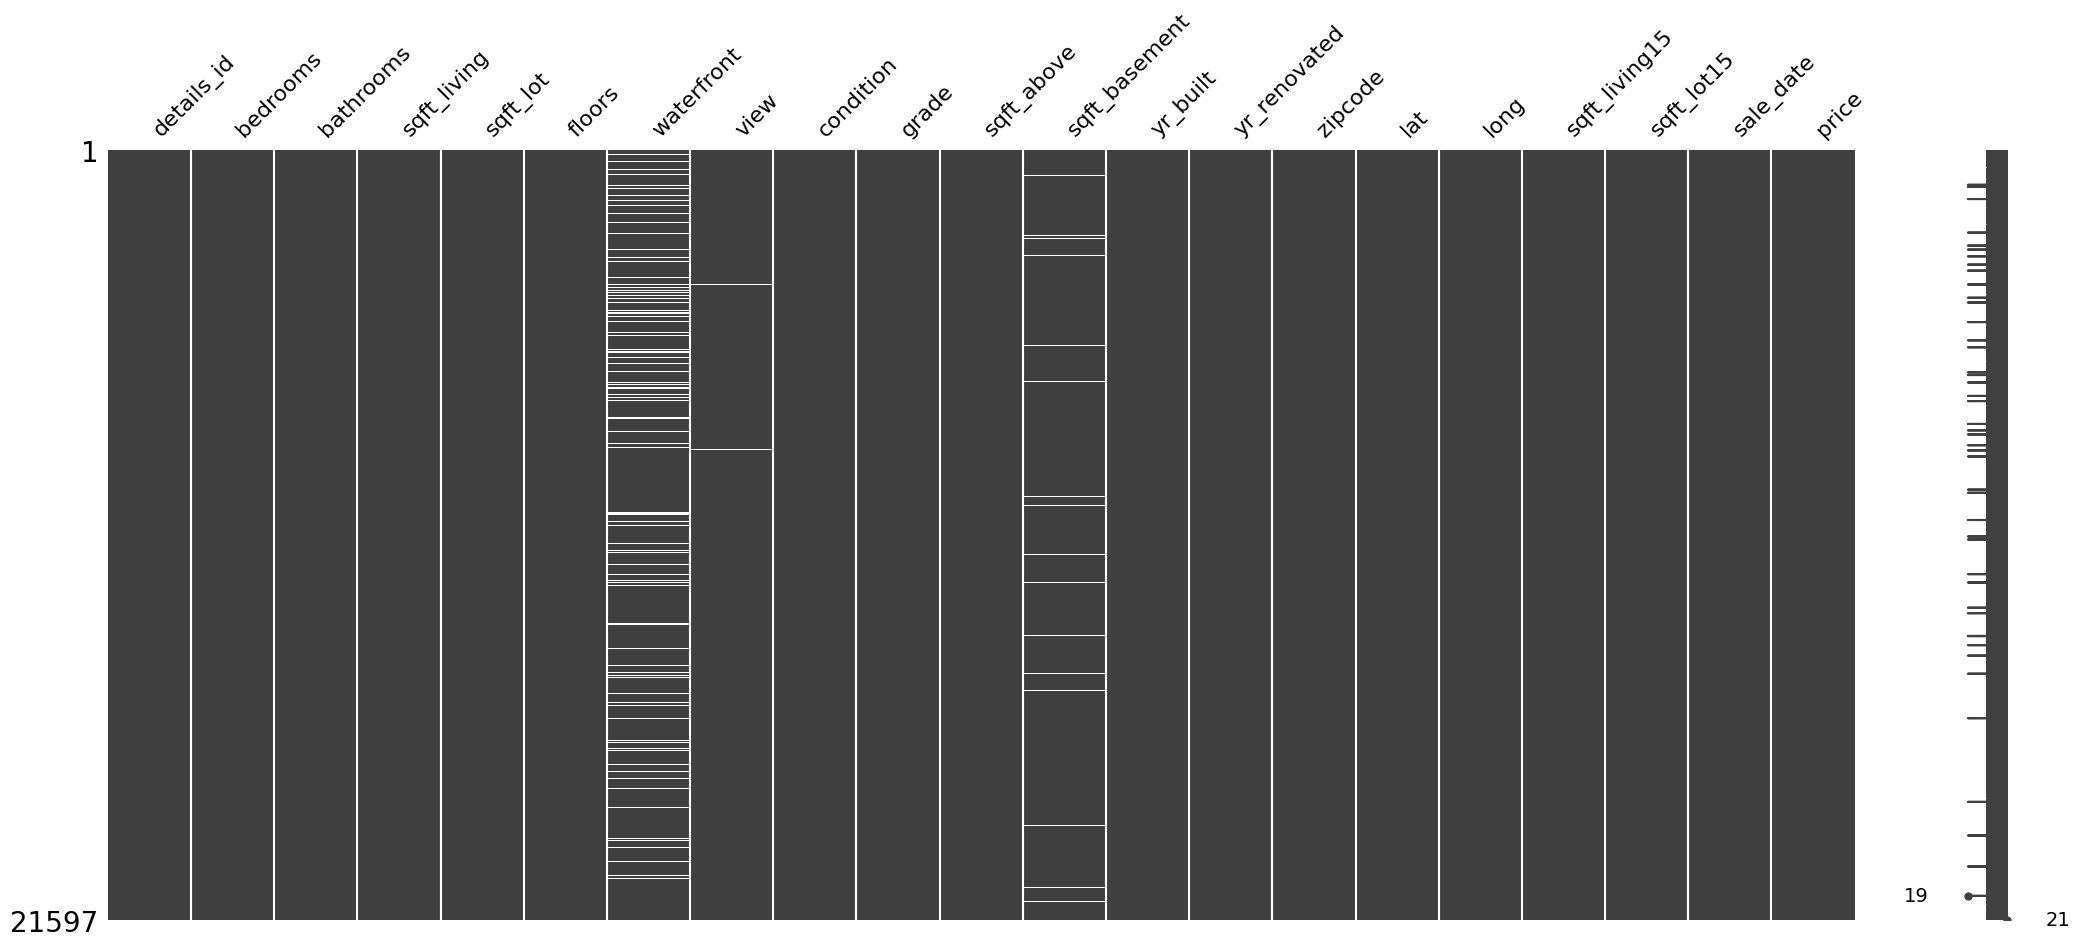

In [18]:
import missingno as msno
msno.matrix(eda_data)
eda_data.isna().sum()

In [19]:
eda_data['sqft_basement'].fillna(eda_data['sqft_basement'].median(), inplace=True)
eda_data['waterfront'].fillna(eda_data['waterfront'].mode()[0], inplace=True)
eda_data['view'].fillna(eda_data['view'].mode()[0], inplace=True)
eda_data.isna().sum()

details_id       0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
sale_date        0
price            0
dtype: int64

### EDA for Data

We will start with getting the basic understanding of the required variables.

In [20]:
print(eda_data['price'].describe())  # Descriptive statistics for prices

count     21597.000
mean     540296.574
std      367368.140
min       78000.000
25%      322000.000
50%      450000.000
75%      645000.000
max     7700000.000
Name: price, dtype: float64


In [21]:
import plotly.express as px

In [22]:
# Scatter plot for geographical distribution

houses = eda_data[['details_id', 'lat', 'long', 'price']]

# Create the scatter mapbox plot
fig = px.scatter_mapbox(houses,
                        lat='lat',
                        lon='long',
                        hover_name='details_id',
                        hover_data=['price'],
                        color_discrete_sequence=['blue'],
                        zoom=9,  # Adjusted for better initial view
                        height=600)  # Adjusted for better visualization

fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[{
        "below": 'traces',
        "sourcetype": "raster",
        "sourceattribution": "United States Geological Survey",
        "source": [
            "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
        ]
    }]
)  # Update layout to use the USGS Imagery map

fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0})  # Adjust margins
fig.update_traces(marker=dict(size=5))  #Adjust dot size
fig.show()  # Display the map


In [23]:
##Categorizing properties into price quartiles

houses['price_quartile'] = pd.qcut(houses['price'], 4, 
                                   labels=['1st Quartile', '2nd Quartile', '3rd Quartile', '4th Quartile'])

fig = px.scatter_mapbox(houses,
                        lat='lat',
                        lon='long',
                        color='price_quartile',  # Color markers by price quartile
                        hover_name='details_id',
                        hover_data=['price'],
                        color_discrete_map={  # Optional: Customize colors for each quartile
                            '1st Quartile': 'yellow',
                            '2nd Quartile': 'green',
                            '3rd Quartile': 'blue',
                            '4th Quartile': 'orange'
                        },
                        zoom=8, 
                        height=600)

fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[{
        "below": 'traces',
        "sourcetype": "raster",
        "sourceattribution": "United States Geological Survey",
        "source": [
            "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
        ]
    }]
)
fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0})
fig.update_traces(marker=dict(size=5))
fig.show()


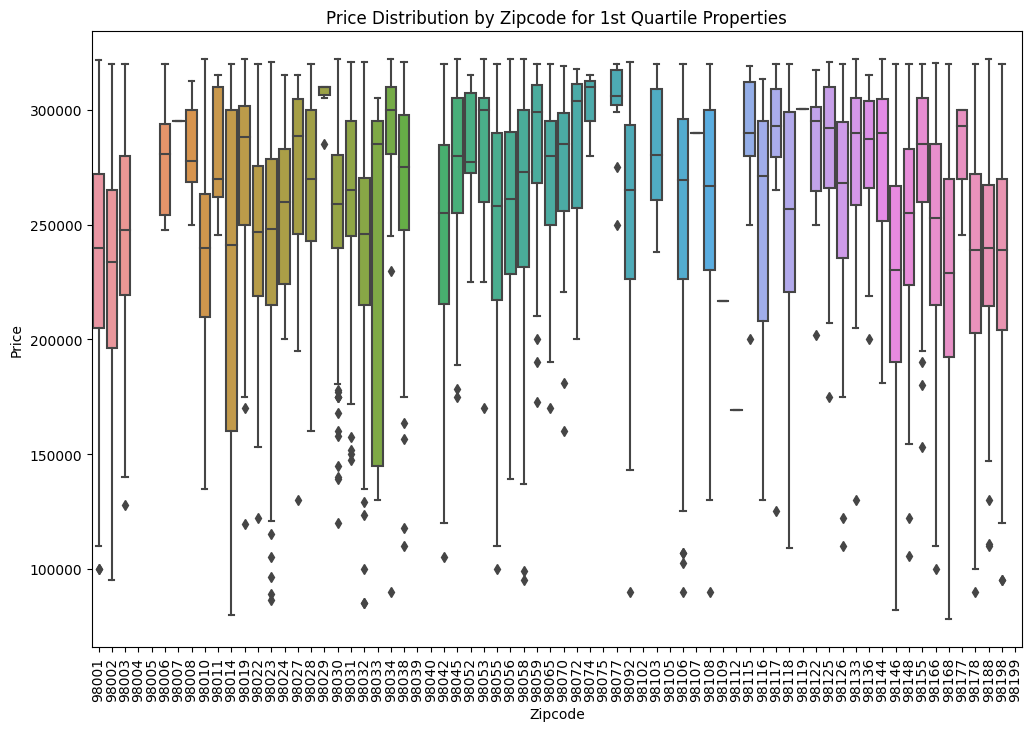

In [24]:
# Boxplot of prices by zipcode

first_quartile_price = eda_data['price'].quantile(0.25)  # Calculating 1st quartile of price variable

first_quartile_data = eda_data[eda_data['price'] <= first_quartile_price]  # Filtering the dataset for properties in the 1st quartile

# Creating boxplot
plt.figure(figsize=(12, 8))  # Adjust figure size
sns.boxplot(x='zipcode', y='price', data=first_quartile_data)

# Improve plot readability
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.title('Price Distribution by Zipcode for 1st Quartile Properties')
plt.xlabel('Zipcode')
plt.ylabel('Price')
plt.show()


#### Analysing property features in the selected zipcodes


In [25]:
first_quartile_houses = eda_data[eda_data['price'] <= first_quartile_price]
first_quartile_houses

details_id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0         1000102     6.000      3.000     2400.000  9373.000   2.000   
1         1000102     6.000      3.000     2400.000  9373.000   2.000   
2       100100050     3.000      1.000     1320.000 11090.000   1.000   
3      1001200035     3.000      1.000     1350.000  7973.000   1.500   
4      1001200050     4.000      1.500     1260.000  7248.000   1.500   
...           ...       ...        ...          ...       ...     ...   
21568   985001321     4.000      1.000     1590.000 24330.000   1.500   
21569   986000045     4.000      1.750     2020.000 10332.000   1.000   
21571  9900000190     3.000      1.000     1320.000  8100.000   1.000   
21581   993000950     2.000      1.500     1110.000  1200.000   3.000   
21586   993001629     3.000      2.750     1120.000   881.000   3.000   

       waterfront  view  condition  grade  ...  sqft_basement  yr_built  \
0           0.000 0.000          3      7  ...          0.000      1991   
1           0.000 0.000          3      7  ...          0.000      1991   
2           0.000 0.000          3      7  ...          0.000      1955   
3           0.000 0.000          3      7  ...          0.000      1954   
4           0.000 0.000          5      7  ...          0.000      1955   
...           ...   ...        ...    ...  ...            ...       ...   
21568       0.000 0.000          3      6  ...        450.000      1942   
21569       0.000 0.000          3      7  ...       1010.000      1954   
21571       0.000 0.000          3      6  ...        440.000      1943   
21581       0.000 0.000          3      8  ...          0.000      2000   
21586       0.000 0.000          3      8  ...          0.000      1999   

       yr_renovated  zipcode    lat     long  sqft_living15  sqft_lot15  \
0                 0    98002 47.326 -122.214       2060.000    7316.000   
1                 0    98002 47.326 -122.214       2060.000    7316.000   
2                 0    98155 47.775 -122.304       1320.000    8319.000   
3                 0    98188 47.432 -122.292       1310.000    7491.000   
4                 0    98188 47.433 -122.292       1300.000    7732.000   
...             ...      ...    ...      ...            ...         ...   
21568             0    98168 47.491 -122.309       1000.000   16228.000   
21569             0    98168 47.506 -122.303       2240.000    8379.000   
21571             0    98166 47.470 -122.351       1000.000    8100.000   
21581             0    98103 47.693 -122.342       1110.000    1363.000   
21586             0    98103 47.691 -122.343       1120.000    1087.000   

       sale_date      price  
0     2014-09-16 280000.000  
1     2015-04-22 300000.000  
2     2014-11-12 275000.000  
3     2015-03-06 272450.000  
4     2014-09-23 259000.000  
...          ...        ...  
21568 2014-12-17 291000.000  
21569 2014-10-07 240000.000  
21571 2014-10-30 268950.000  
21581 2014-09-06 320000.000  
21586 2014-11-17 265000.000  

[5406 rows x 21 columns]

In [44]:
eda_data.sqft_living.describe()

count   21597.000
mean     2080.322
std       918.106
min       370.000
25%      1430.000
50%      1910.000
75%      2550.000
max     13540.000
Name: sqft_living, dtype: float64

In [43]:
filtered_houses = first_quartile_houses[(first_quartile_houses['bedrooms'] <= 3)]
filtered_houses = filtered_houses[filtered_houses['bathrooms'] <= 2]
filtered_houses = filtered_houses[filtered_houses['sqft_living'] < 1500]
filtered_houses = filtered_houses[filtered_houses['sqft_living15'] < 1500]
filtered_houses = filtered_houses[filtered_houses['zipcode'].isin([98106, 98118, 98126, 98133, 98144, 98108])]
#filtered_houses = filtered_houses[filtered_houses['yr_built'] >= 1960]
#filtered_houses = filtered_houses[filtered_houses['condition'] == 3]
filtered_houses

details_id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
15     1005000062     2.000      1.000     1040.000  4600.000   1.000   
210    1072100085     3.000      1.000     1480.000  7830.000   1.000   
218    1077100035     3.000      1.500     1400.000  9087.000   1.000   
322    1105000373     2.000      1.500     1110.000   986.000   2.000   
324    1105000432     3.000      1.500     1440.000  8370.000   1.000   
...           ...       ...        ...          ...       ...     ...   
20854  9485700175     2.000      1.000      860.000 12160.000   1.000   
20887  9505100035     2.000      1.000     1250.000  8520.000   1.000   
20966   952004570     2.000      1.000     1140.000  3834.000   1.500   
20967   952004725     2.000      1.000      880.000  5750.000   1.000   
21522  9834201470     2.000      1.500     1000.000  1075.000   2.000   

       waterfront  view  condition  grade  ...  sqft_basement  yr_built  \
15          0.000 0.000          4      6  ...          0.000      1950   
210         0.000 0.000          3      7  ...          0.000      1952   
218         0.000 0.000          3      7  ...          0.000      1954   
322         0.000 0.000          3      7  ...        160.000      2009   
324         0.000 0.000          3      7  ...          0.000      1977   
...           ...   ...        ...    ...  ...            ...       ...   
20854       0.000 0.000          4      6  ...          0.000      1921   
20887       0.000 0.000          3      6  ...          0.000      1928   
20966       0.000 0.000          3      6  ...          0.000      1911   
20967       0.000 0.000          3      6  ...          0.000      1939   
21522       0.000 0.000          3      7  ...        160.000      2007   

       yr_renovated  zipcode    lat     long  sqft_living15  sqft_lot15  \
15                0    98118 47.539 -122.277       1390.000    5897.000   
210               0    98133 47.770 -122.336       1450.000    7830.000   
218               0    98133 47.771 -122.340       1490.000    8380.000   
322               0    98118 47.543 -122.272       1110.000    3515.000   
324               0    98118 47.542 -122.275       1440.000    8370.000   
...             ...      ...    ...      ...            ...         ...   
20854             0    98106 47.527 -122.361       1010.000    7611.000   
20887             0    98126 47.516 -122.378       1040.000    8520.000   
20966             0    98126 47.564 -122.378       1190.000    5750.000   
20967             0    98126 47.564 -122.379       1190.000    5750.000   
21522             0    98144 47.571 -122.288       1000.000    1083.000   

       sale_date      price  
15    2014-08-01 299000.000  
210   2014-05-14 310000.000  
218   2015-01-22 320000.000  
322   2015-05-06 252500.000  
324   2014-08-22 224000.000  
...          ...        ...  
20854 2014-09-30 310000.000  
20887 2014-11-05 200000.000  
20966 2014-12-06 320000.000  
20967 2014-11-06 280000.000  
21522 2014-12-18 303000.000  

[381 rows x 21 columns]

In [42]:
import plotly.express as px

fig = px.scatter_mapbox(houses,
                        lat='lat',
                        lon='long',
                        color='price_quartile',  # Color markers by price quartile
                        hover_name='details_id',
                        hover_data=['price'],
                        color_discrete_map={  # Customize colors for each quartile
                            '1st Quartile': 'yellow',
                            '2nd Quartile': 'blue',
                            '3rd Quartile': 'blue',
                            '4th Quartile': 'blue'
                        },
                        zoom=8, 
                        height=600)

fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[{
        "below": 'traces',
        "sourcetype": "raster",
        "sourceattribution": "United States Geological Survey",
        "source": [
            "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
        ]
    }]
)
fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0})
fig.update_traces(marker=dict(size=5))

# Adding the filtered houses as a 2nd layer
fig.add_trace(
    px.scatter_mapbox(filtered_houses,
                      lat='lat',
                      lon='long',
                      hover_name='details_id',  # Adjust based on your column name
                      hover_data=['price'],
                      color_discrete_sequence=['red'],  # Distinct color for visibility
                      ).data[0]  # Extract the trace generated by px.scatter_mapbox
)

fig.show()


sort by pincode

In [29]:
x=filtered_houses.groupby('zipcode')['details_id'].count().reset_index(name='count').sort_values(by='count', ascending=False)
print(x.head(20))

   zipcode  count
44   98106    107
52   98118     81
57   98133     70
56   98126     66
46   98108     37
59   98144     20
37   98074      0
49   98115      0
48   98112      0
47   98109      0
45   98107      0
38   98075      0
50   98116      0
43   98105      0
42   98103      0
41   98102      0
40   98092      0
39   98077      0
0    98001      0
53   98119      0


In [30]:
y=filtered_houses[filtered_houses['yr_built'] > 1960]['details_id'].count()#sort_values(by='yr_built', ascending=True)
y#.head(20)

84

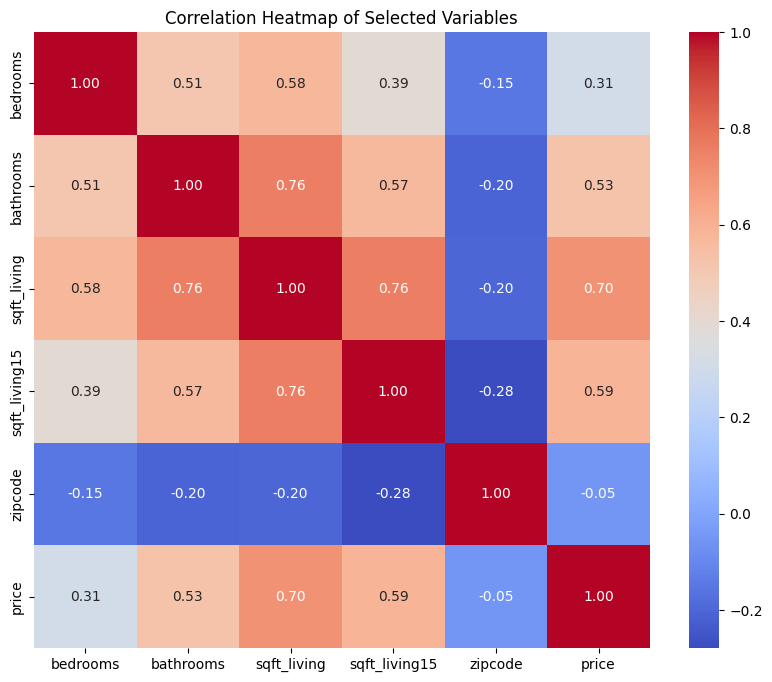

In [31]:
selected_vars = eda_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_living15', 'zipcode', 'price']]
corr = selected_vars.corr()
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap of Selected Variables')
plt.show()

In [ ]:
# Features correlated to the Sales price

plt.figure(figsize=(8, 10))
heatmap2 = sns.heatmap(df08.corr().round(2)[['price']].sort_values(by='price',
                                      ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap2.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=12);